## Model training and testing

In [1]:
import joblib
import matplotlib.pyplot as plt
import sklearn
import numpy as np

from generate_data import train_model
from generate_data import load_data

In [2]:
# Train on generated data
set_name = 'training_set'
train_model(set_name)

estimator = joblib.load('estimator.pkl')


/home/alejandro/anaconda3/envs/ml-op/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...


[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    2.0s remaining:    4.6s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    2.2s remaining:    0.9s


Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...
Building estimator 1 of 1 for this parallel run (total 10)...


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    2.6s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.8s remaining:    1.9s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    1.4s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
/home/alejandro/anaconda3/envs/ml-op/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Par

Training: R2 = 0.6085015508857393, MAE = 7.4490073490503185e-06
Test: R2 = nan, MAE = 1.779561592370905e-05


[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


In [3]:
estimator = joblib.load('estimator.pkl')

In [4]:
input_data, output_data = load_data('training_set')

In [5]:
print(input_data.shape)
print(output_data.shape)

(5, 3347)
(5, 32)


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished


(array([4., 0., 2., 4., 3., 7., 2., 6., 2., 2.]),
 array([-2.47740132e-05, -1.99973374e-05, -1.52206616e-05, -1.04439857e-05,
        -5.66730991e-06, -8.90634094e-07,  3.88604173e-06,  8.66271755e-06,
         1.34393934e-05,  1.82160692e-05,  2.29927450e-05]),
 <BarContainer object of 10 artists>)

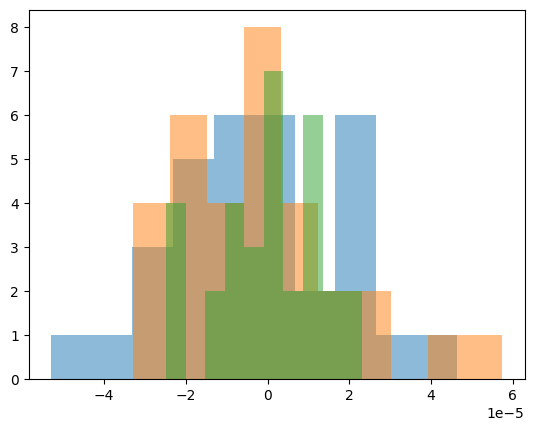

In [6]:
#Example histogram for the errors for a single simulation.

plt.hist(estimator.predict(input_data)[0],alpha = 0.5)
plt.hist(output_data[0], alpha = 0.5)
plt.hist(estimator.predict(input_data)[0]-output_data[0], alpha=0.5)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished


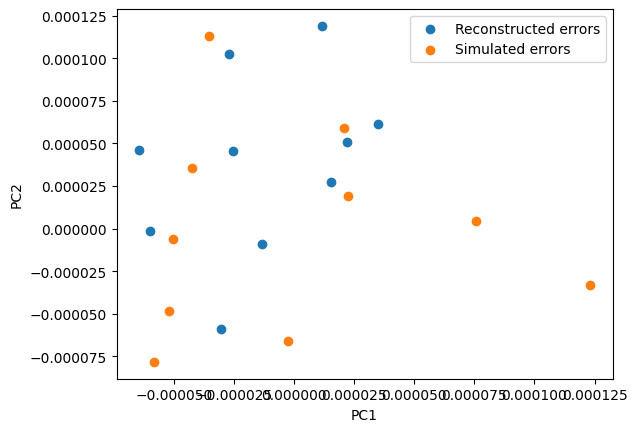

In [7]:
#PCA visualization of the simulated magnet errors and reconstruction, 
# for an unbiased regression a similar distribution is expected, for an 
# accurate regression the spread should be similar 

pca = sklearn.decomposition.PCA(n_components=2)

predicted_data = estimator.predict(input_data)

pca.fit(output_data) # Fitting PCA decomposition to extract the most important components of the simulation data

pred_red_data = pca.transform(predicted_data)
output_red_data = pca.transform(output_data)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(pred_red_data[:,0], pred_red_data[:,1], label="Reconstructed errors")
plt.scatter(output_red_data[:,0], output_red_data[:,1], label="Simulated errors")
plt.legend()

In [2]:
print("\u001b[0;31m---------------------------------------------------------------------------\u001b[0m\n\u001b[0;31mIndexError\u001b[0m                                Traceback (most recent call last)\nCell \u001b[0;32mIn[3], line 291\u001b[0m\n\u001b[1;32m    287\u001b[0m     \u001b[39mreturn\u001b[39;00m np\u001b[39m.\u001b[39marray(total_phase)\n\u001b[1;32m    290\u001b[0m \u001b[39mif\u001b[39;00m \u001b[39m__name__\u001b[39m \u001b[39m==\u001b[39m \u001b[39m\"\u001b[39m\u001b[39m__main__\u001b[39m\u001b[39m\"\u001b[39m:\n\u001b[0;32m--> 291\u001b[0m     main()\n\nCell \u001b[0;32mIn[3], line 53\u001b[0m, in \u001b[0;36mmain\u001b[0;34m()\u001b[0m\n\u001b[1;32m     44\u001b[0m GENERATE_DATA \u001b[39m=\u001b[39m \u001b[39mTrue\u001b[39;00m\n\u001b[1;32m     46\u001b[0m \u001b[39mif\u001b[39;00m GENERATE_DATA\u001b[39m==\u001b[39m\u001b[39mTrue\u001b[39;00m:\n\u001b[1;32m     47\u001b[0m     \u001b[39m# run simulations in parallel\u001b[39;00m\n\u001b[1;32m     48\u001b[0m     \u001b[39m#pool = Pool(processes=5) #30\u001b[39;00m\n\u001b[1;32m     49\u001b[0m     \u001b[39m#all_samples = pool.map(create_sample, range(num_sim))\u001b[39;00m\n\u001b[1;32m     50\u001b[0m     \u001b[39m#pool.close()\u001b[39;00m\n\u001b[1;32m     51\u001b[0m     \u001b[39m#pool.join()\u001b[39;00m\n\u001b[0;32m---> 53\u001b[0m     all_samples \u001b[39m=\u001b[39m [create_sample(i) \u001b[39mfor\u001b[39;00m i \u001b[39min\u001b[39;00m \u001b[39mrange\u001b[39m(num_sim)]\n\u001b[1;32m     55\u001b[0m     \u001b[39m# if twiss failed, sample will be None --> filter, check number of samples\u001b[39;00m\n\u001b[1;32m     56\u001b[0m     \u001b[39m# usually, around ~2% of simulations fail due to generated error distribition\u001b[39;00m\n\u001b[1;32m     57\u001b[0m     \u001b[39mfor\u001b[39;00m sample \u001b[39min\u001b[39;00m all_samples:\n\nCell \u001b[0;32mIn[3], line 53\u001b[0m, in \u001b[0;36m<listcomp>\u001b[0;34m(.0)\u001b[0m\n\u001b[1;32m     44\u001b[0m GENERATE_DATA \u001b[39m=\u001b[39m \u001b[39mTrue\u001b[39;00m\n\u001b[1;32m     46\u001b[0m \u001b[39mif\u001b[39;00m GENERATE_DATA\u001b[39m==\u001b[39m\u001b[39mTrue\u001b[39;00m:\n\u001b[1;32m     47\u001b[0m     \u001b[39m# run simulations in parallel\u001b[39;00m\n\u001b[1;32m     48\u001b[0m     \u001b[39m#pool = Pool(processes=5) #30\u001b[39;00m\n\u001b[1;32m     49\u001b[0m     \u001b[39m#all_samples = pool.map(create_sample, range(num_sim))\u001b[39;00m\n\u001b[1;32m     50\u001b[0m     \u001b[39m#pool.close()\u001b[39;00m\n\u001b[1;32m     51\u001b[0m     \u001b[39m#pool.join()\u001b[39;00m\n\u001b[0;32m---> 53\u001b[0m     all_samples \u001b[39m=\u001b[39m [create_sample(i) \u001b[39mfor\u001b[39;00m i \u001b[39min\u001b[39;00m \u001b[39mrange\u001b[39m(num_sim)]\n\u001b[1;32m     55\u001b[0m     \u001b[39m# if twiss failed, sample will be None --> filter, check number of samples\u001b[39;00m\n\u001b[1;32m     56\u001b[0m     \u001b[39m# usually, around ~2% of simulations fail due to generated error distribition\u001b[39;00m\n\u001b[1;32m     57\u001b[0m     \u001b[39mfor\u001b[39;00m sample \u001b[39min\u001b[39;00m all_samples:\n\nCell \u001b[0;32mIn[3], line 200\u001b[0m, in \u001b[0;36mcreate_sample\u001b[0;34m(index)\u001b[0m\n\u001b[1;32m    194\u001b[0m madx\u001b[39m.\u001b[39minput(template_str \u001b[39m%\u001b[39m {\u001b[39m\"\u001b[39m\u001b[39mINDEX\u001b[39m\u001b[39m\"\u001b[39m: \u001b[39mstr\u001b[39m(index), \\\n\u001b[1;32m    195\u001b[0m     \u001b[39m\"\u001b[39m\u001b[39mOPTICS\u001b[39m\u001b[39m\"\u001b[39m: OPTICS_40CM_2016, \u001b[39m\"\u001b[39m\u001b[39mSEED\u001b[39m\u001b[39m\"\u001b[39m: seed})\u001b[39m#, \\madx_path=\"/afs/cern.ch/user/m/mad/madx/releases/last-rel/madx-linux64-intel\")\u001b[39;00m\n\u001b[1;32m    197\u001b[0m twiss_data_b2 \u001b[39m=\u001b[39m madx\u001b[39m.\u001b[39mtable\u001b[39m.\u001b[39mtwiss\u001b[39m.\u001b[39mdframe()\n\u001b[1;32m    199\u001b[0m delta_beta_star_x_b1, delta_beta_star_y_b1, \\\n\u001b[0;32m--> 200\u001b[0m     delta_mux_b1, delta_muy_b1, n_disp_b1 \u001b[39m=\u001b[39m get_input_for_beam(twiss_data_b1,  B1_MONITORS_MDL_TFS, \u001b[39m1\u001b[39;49m)\n\u001b[1;32m    202\u001b[0m delta_beta_star_x_b2, delta_beta_star_y_b2, \\\n\u001b[1;32m    203\u001b[0m     delta_mux_b2, delta_muy_b2, n_disp_b2 \u001b[39m=\u001b[39m get_input_for_beam(twiss_data_b2 , B2_MONITORS_MDL_TFS, \u001b[39m2\u001b[39m)\n\u001b[1;32m    204\u001b[0m \u001b[39m\u001b[39m\u001b[39m\"\"\"\u001b[39;00m\n\u001b[1;32m    205\u001b[0m \u001b[39mb1_twiss_monitors_path = \"./magnet_errors/b1_twiss_{}.tfs\".format(index)\u001b[39;00m\n\u001b[1;32m    206\u001b[0m \u001b[39mb2_twiss_monitors_path = \"./magnet_errors/b2_twiss_{}.tfs\".format(index)\u001b[39;00m\n\u001b[0;32m   (...)\u001b[0m\n\u001b[1;32m    230\u001b[0m \u001b[39m    all_samples = [create_sample]\u001b[39;00m\n\u001b[1;32m    231\u001b[0m \u001b[39m\"\"\"\u001b[39;00m\n\nCell \u001b[0;32mIn[3], line 260\u001b[0m, in \u001b[0;36mget_input_for_beam\u001b[0;34m(twiss_df, meas_mdl, beam)\u001b[0m\n\u001b[1;32m    257\u001b[0m ip_bpms \u001b[39m=\u001b[39m ip_bpms_b1 \u001b[39mif\u001b[39;00m beam \u001b[39m==\u001b[39m \u001b[39m1\u001b[39m \u001b[39melse\u001b[39;00m ip_bpms_b2\n\u001b[1;32m    259\u001b[0m \u001b[39m# phase advance deviations\u001b[39;00m\n\u001b[0;32m--> 260\u001b[0m phase_adv_x \u001b[39m=\u001b[39m get_phase_adv(tw_perturbed[\u001b[39m'\u001b[39;49m\u001b[39mmux\u001b[39;49m\u001b[39m'\u001b[39;49m], QX)\n\u001b[1;32m    261\u001b[0m phase_adv_y \u001b[39m=\u001b[39m get_phase_adv(tw_perturbed[\u001b[39m'\u001b[39m\u001b[39mmuy\u001b[39m\u001b[39m'\u001b[39m], QY)\n\u001b[1;32m    262\u001b[0m mdl_ph_adv_x \u001b[39m=\u001b[39m get_phase_adv(meas_mdl[\u001b[39m'\u001b[39m\u001b[39mmux\u001b[39m\u001b[39m'\u001b[39m], QX)\n\nCell \u001b[0;32mIn[3], line 280\u001b[0m, in \u001b[0;36mget_phase_adv\u001b[0;34m(total_phase, tune)\u001b[0m\n\u001b[1;32m    278\u001b[0m \u001b[39mdef\u001b[39;00m \u001b[39mget_phase_adv\u001b[39m(total_phase, tune):\n\u001b[1;32m    279\u001b[0m     phase_diff \u001b[39m=\u001b[39m np\u001b[39m.\u001b[39mdiff(total_phase)\n\u001b[0;32m--> 280\u001b[0m     last_to_first \u001b[39m=\u001b[39m total_phase[\u001b[39m0\u001b[39;49m] \u001b[39m-\u001b[39m (total_phase[\u001b[39m-\u001b[39m\u001b[39m1\u001b[39m] \u001b[39m-\u001b[39m tune)\n\u001b[1;32m    281\u001b[0m     phase_adv \u001b[39m=\u001b[39m np\u001b[39m.\u001b[39mappend(phase_diff, last_to_first)\n\u001b[1;32m    282\u001b[0m     \u001b[39mreturn\u001b[39;00m phase_adv\n\nFile \u001b[0;32m~/anaconda3/envs/ml-op/lib/python3.9/site-packages/pandas/core/series.py:939\u001b[0m, in \u001b[0;36mSeries.__getitem__\u001b[0;34m(self, key)\u001b[0m\n\u001b[1;32m    <a href='file:///home/alejandro/anaconda3/envs/ml-op/lib/python3.9/site-packages/pandas/core/series.py?line=935'>936</a>\u001b[0m     key \u001b[39m=\u001b[39m unpack_1tuple(key)\n\u001b[1;32m    <a href='file:///home/alejandro/anaconda3/envs/ml-op/lib/python3.9/site-packages/pandas/core/series.py?line=937'>938</a>\u001b[0m \u001b[39mif\u001b[39;00m is_integer(key) \u001b[39mand\u001b[39;00m \u001b[39mself\u001b[39m\u001b[39m.\u001b[39mindex\u001b[39m.\u001b[39m_should_fallback_to_positional():\n\u001b[0;32m--> <a href='file:///home/alejandro/anaconda3/envs/ml-op/lib/python3.9/site-packages/pandas/core/series.py?line=938'>939</a>\u001b[0m     \u001b[39mreturn\u001b[39;00m \u001b[39mself\u001b[39;49m\u001b[39m.\u001b[39;49m_values[key]\n\u001b[1;32m    <a href='file:///home/alejandro/anaconda3/envs/ml-op/lib/python3.9/site-packages/pandas/core/series.py?line=940'>941</a>\u001b[0m \u001b[39melif\u001b[39;00m key_is_scalar:\n\u001b[1;32m    <a href='file:///home/alejandro/anaconda3/envs/ml-op/lib/python3.9/site-packages/pandas/core/series.py?line=941'>942</a>\u001b[0m     \u001b[39mreturn\u001b[39;00m \u001b[39mself\u001b[39m\u001b[39m.\u001b[39m_get_value(key)\n\n\u001b[0;31mIndexError\u001b[0m: index 0 is out of bounds for axis 0 with size 0")

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
Cell In[3], line 291
    287     return np.array(total_phase)
    290 if __name__ == "__main__":
--> 291     main()

Cell In[3], line 53, in main()
     44 GENERATE_DATA = True
     46 if GENERATE_DATA==True:
     47     # run simulations in parallel
     48     #pool = Pool(processes=5) #30
     49     #all_samples = pool.map(create_sample, range(num_sim))
     50     #pool.close()
     51     #pool.join()
---> 53     all_samples = [create_sample(i) for i in range(num_sim)]
     55     # if twiss failed, sample will be None --> filter, check number of samples
     56     # usually, around ~2% of simulations fail due to generated error distribition
     57     for sample in all_samples:

Cell In[3], line 53, in <listcomp>(.0)
     44 GENERATE_DATA = True
     46 if GENERATE_DATA==True:
     47     # run simulations in parallel
     48  